In [1]:
import gshap
from gshap.hypothesis import HypothesisTest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = Lasso(alpha=.1)
reg.fit(X_train, y_train)
print('Test score: %.4f' % reg.score(X_test, y_test))

Test score: 0.5580


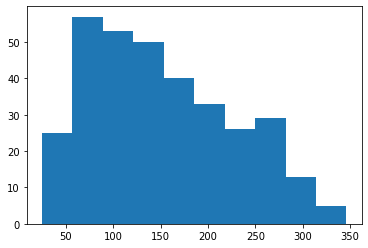

152.19335347432028

In [3]:
plt.hist(y_train)
plt.show()
reg.predict(X_train).mean()

In [6]:
statistic = lambda y: y.mean()
test = lambda y_bar: y_bar > 155
g = HypothesisTest(statistic, test, 100)
explainer = gshap.KernelExplainer(reg.predict, X_train, g)
x = X_test[reg.predict(X_test) > 70]
gshap_values = explainer.gshap_values(x, nsamples=100)

In [7]:
g_comparison, g_background = explainer.compare(x, bootstrap_samples=100)
print(g_comparison)
print(g_background)
print(g_comparison-g_background)
print(gshap_values.sum())

0.95
0.327
0.623
0.6305000000000002


In [8]:
gshap_values

array([ 0.0089, -0.0648,  0.2148,  0.1444, -0.0088, -0.0013,  0.173 ,
       -0.0008,  0.1518,  0.0133])